# Experiments and analysis for 1st paper

For each output variable [TPHYSTND_NORAD, PHQ, QRL, QRS] the $R^2$ is computed for each level $z$ and then averaged:

$$ R^2_z = 1 - (SSE_z / TVAR_z) $$

where SSE, the sum of squared errors is computed from the predicted values $y$ and the corresponding true values $\hat{y}$:

$$ SSE_z = \frac{1}{nt \times nx \times ny}\sum_{nt}\sum_{nx}\sum_{ny} (y_{t, x, y} - \hat{y}_{t, x, y})^2$$

and the TVAR, the true variance is:

$$ TVAR_Z = \frac{1}{nt \times nx \times ny}\sum_{nt}\sum_{nx}\sum_{ny} (\hat{y}_{t, x, y} - \bar{\hat{y}})^2 $$

with $\bar{\hat{y}}$ being the true mean over $t, x, y$.

In [18]:
from cbrain.imports import *
%matplotlib inline

/export/home/srasp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Network architecture sensitivity test

- Training: 60 days. Days 5-9 from each month of year 1.
- Validation: 60 days. Days 5-9 from each month of year 2.

The goal of this sensitivity test is to assess the number of parameters and the arrangement (shallow vs. wide).

- Number of input variables: 123
- Number of output variables: 120

All networks are trained with LeakyReLU activation functions $z(a) = \max(0.3x, x)$.

For input normalization, we are subtracting each variable by its mean and then divide it by its standard deviation to get mean zero, standard deviation one. 

For the outputs we are multiplying the heating tendencies (TPHYSTND_NORAD, QRL, QRS) by $C_p = 1 \times 10^3$ and the moistening tendency PHQ by $L_v = 2.5 \times 10^6$, so that they are all in energy units W/m^2. 


In [15]:
def npar(l):
    l = [l] if not type(l) == list else l
    l = [123] + l + [120]
    return sum([l[i] * l[i+1] + l[i+1] for i in range(len(l)-1)])

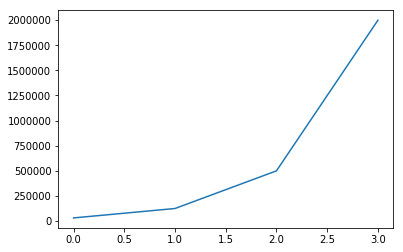

In [22]:
plt.plot([npar(l) for l in [128, 512, 2048, 8192]]);

In [23]:
npar([1024]*4)

3398776

## Training amount sensitivity tests

Using selected network from above.

- Training with continuous periods:
    - 1 week
    - 1 month
    - 3 month
    - 6 month
    - 9 month
    - 12 month
- Validation
    - Test: 60 days vs full 2nd year